In [1]:
#A1
def summation_unit(inputs, weights):
    """
    Calculates the weighted sum of the inputs.
    
    Args:
    inputs (list): Input values to the perceptron.
    weights (list): Weights for each input.
    
    Returns:
    float: Weighted sum.
    """
    weighted_sum = weights[0]  # Start with the bias weight
    for i in range(len(inputs)):
        weighted_sum += inputs[i] * weights[i + 1]  # Add each input multiplied by its weight
    return weighted_sum

In [3]:
import numpy as np

def step_function(x):
    """Step activation function."""
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    """Bipolar Step activation function."""
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def tanh_function(x):
    """TanH activation function."""
    return np.tanh(x)

def relu_function(x):
    """ReLU activation function."""
    return max(0, x)

def leaky_relu_function(x):
    """Leaky ReLU activation function."""
    return x if x > 0 else 0.01 * x

In [5]:
def calculate_error(y_true, y_pred):
    """
    Calculates the difference between the true and predicted output.
    
    Args:
    y_true (float): Actual output.
    y_pred (float): Predicted output by the perceptron.
    
    Returns:
    float: Error value.
    """
    return y_true - y_pred


Converged after 129 epochs


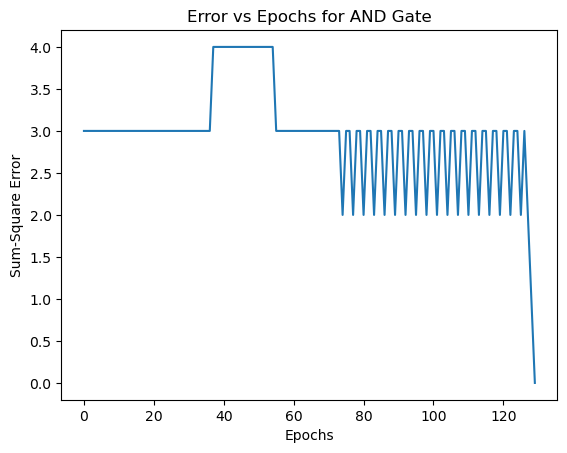

In [7]:
#A2
# Define the initial weights and learning rate
W = [10, 0.2, -0.75]  # [W0, W1, W2]
learning_rate = 0.05
convergence_error = 0.002

# Data for AND Gate
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 0, 0, 1]

def perceptron_training(inputs, outputs, weights, learning_rate):
    epochs = 0
    errors = []
    
    while epochs < 1000:
        total_error = 0
        for i in range(len(inputs)):
            # Calculate weighted sum
            weighted_sum = summation_unit(inputs[i], weights)
            
            # Predict output using step activation function
            y_pred = step_function(weighted_sum)
            
            # Calculate error
            error = calculate_error(outputs[i], y_pred)
            total_error += error ** 2  # Sum of squared errors
            
            # Update weights
            weights[0] += learning_rate * error  # Update bias
            for j in range(len(inputs[i])):
                weights[j + 1] += learning_rate * error * inputs[i][j]

        # Append the total error for the epoch
        errors.append(total_error)
        
        # Check for convergence
        if total_error <= convergence_error:
            print(f"Converged after {epochs} epochs")
            break
        
        epochs += 1

    return weights, epochs, errors

# Train the perceptron
final_weights, num_epochs, errors = perceptron_training(inputs, outputs, W, learning_rate)

# Plotting the error vs epochs
import matplotlib.pyplot as plt

plt.plot(range(len(errors)), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs for AND Gate')
plt.show()

Converged after 299 epochs with relu_function function


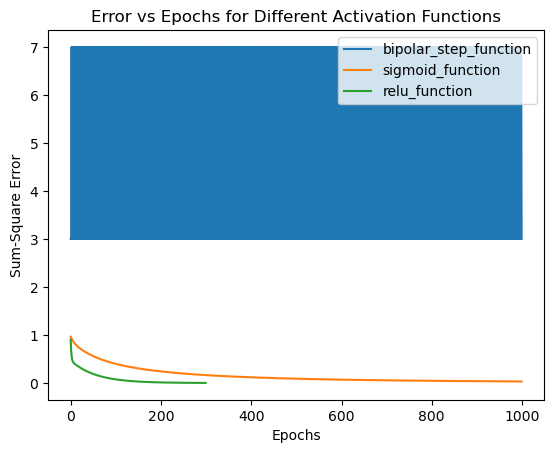

In [9]:
#A3
def perceptron_training_custom_activation(inputs, outputs, weights, learning_rate, activation_function):
    epochs = 0
    errors = []
    
    while epochs < 1000:
        total_error = 0
        for i in range(len(inputs)):
            # Calculate weighted sum
            weighted_sum = summation_unit(inputs[i], weights)
            
            # Predict output using custom activation function
            y_pred = activation_function(weighted_sum)
            
            # Calculate error
            error = calculate_error(outputs[i], y_pred)
            total_error += error ** 2  # Sum of squared errors
            
            # Update weights
            weights[0] += learning_rate * error  # Update bias
            for j in range(len(inputs[i])):
                weights[j + 1] += learning_rate * error * inputs[i][j]

        # Append the total error for the epoch
        errors.append(total_error)
        
        # Check for convergence
        if total_error <= convergence_error:
            print(f"Converged after {epochs} epochs with {activation_function.__name__} function")
            break
        
        epochs += 1

    return weights, epochs, errors

# Train the perceptron with different activation functions
activation_functions = [bipolar_step_function, sigmoid_function, relu_function]

for func in activation_functions:
    final_weights, num_epochs, errors = perceptron_training_custom_activation(inputs, outputs, W.copy(), learning_rate, func)
    plt.plot(range(len(errors)), errors, label=func.__name__)

plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs for Different Activation Functions')
plt.legend()
plt.show()


Converged after 0 epochs
Converged after 0 epochs
Converged after 0 epochs
Converged after 0 epochs
Converged after 0 epochs
Converged after 0 epochs
Converged after 0 epochs
Converged after 0 epochs
Converged after 0 epochs
Converged after 0 epochs


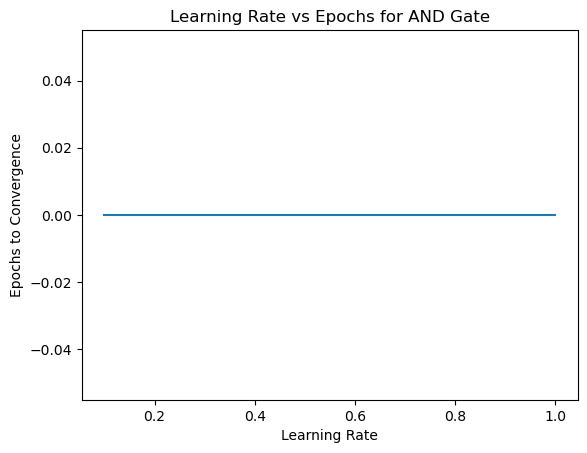

In [11]:
#A4
learning_rates = [0.1 * i for i in range(1, 11)]
convergence_epochs = []

for rate in learning_rates:
    _, epochs, _ = perceptron_training(inputs, outputs, W.copy(), rate)
    convergence_epochs.append(epochs)

plt.plot(learning_rates, convergence_epochs)
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Convergence')
plt.title('Learning Rate vs Epochs for AND Gate')
plt.show()

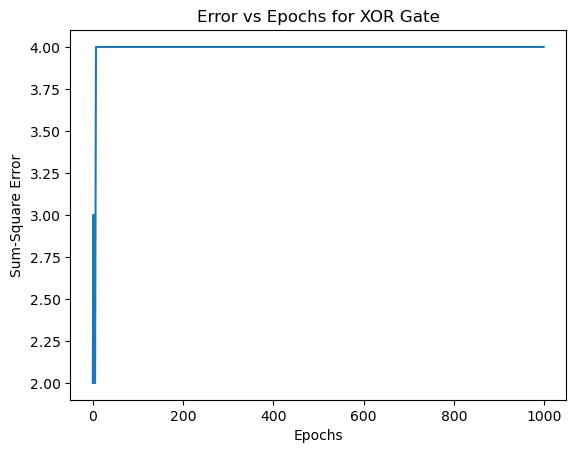

In [13]:
#A5
# Data for XOR Gate
inputs_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs_xor = [0, 1, 1, 0]

# Train the perceptron for XOR logic
final_weights_xor, num_epochs_xor, errors_xor = perceptron_training(inputs_xor, outputs_xor, W, learning_rate)

plt.plot(range(len(errors_xor)), errors_xor)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs for XOR Gate')
plt.show()


In [15]:
#A6
import numpy as np

# Define the sigmoid activation function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Define the perceptron training function with a custom activation function
def perceptron_training_custom_activation(X, y, W, learning_rate, activation_function, max_epochs=1000, convergence_error=0.002):
    num_epochs = 0
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            # Calculate the weighted sum
            weighted_sum = np.dot(X[i], W)
            
            # Apply the custom activation function (sigmoid in this case)
            output = activation_function(weighted_sum)
            
            # Calculate the error
            error = y[i] - output
            
            # Update weights
            W += learning_rate * error * X[i]
            
            # Accumulate squared error for convergence check
            total_error += error ** 2
        
        # Calculate mean squared error
        mean_squared_error = total_error / len(X)
        errors.append(mean_squared_error)
        
        num_epochs += 1

        # Stop if the convergence error condition is met
        if mean_squared_error <= convergence_error:
            print(f"Converged after {num_epochs} epochs.")
            break

    return W, num_epochs, errors

# Customer data for perceptron training
X = np.array([[20, 6, 2],
              [16, 3, 6],
              [27, 6, 2],
              [19, 1, 2],
              [24, 4, 2],
              [22, 1, 5],
              [15, 4, 2],
              [18, 4, 2],
              [21, 1, 4],
              [16, 2, 4]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # 1 for High Value, 0 for Low Value

# Initial weights and learning rate
W = np.array([0.1, 0.2, 0.3])  # You can initialize with different weights if required
learning_rate = 0.05

# Use sigmoid function to train a perceptron
final_weights_customer, num_epochs_customer, errors_customer = perceptron_training_custom_activation(
    X, y, W, learning_rate, sigmoid_function
)

print("Final Weights after Training:", final_weights_customer)
print("Number of Epochs:", num_epochs_customer)


Converged after 71 epochs.
Final Weights after Training: [-1.33277112  8.60269717  0.13996121]
Number of Epochs: 71


In [17]:
#A7
import numpy as np

# Using matrix pseudo-inverse for comparison
X_matrix = np.array(X)
y_matrix = np.array(y).reshape(-1, 1)

pseudo_inverse = np.linalg.pinv(X_matrix)
weights_pseudo_inverse = np.dot(pseudo_inverse, y_matrix)

print("Weights obtained by Matrix Pseudo-Inverse:", weights_pseudo_inverse)


Weights obtained by Matrix Pseudo-Inverse: [[-0.0196597 ]
 [ 0.26431172]
 [ 0.04554979]]


In [19]:
#A8
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training function for backpropagation
def train_neural_network(X, y, learning_rate=0.05, max_epochs=1000, convergence_error=0.002):
    # Initialize weights randomly
    np.random.seed(42)  # for reproducibility
    W1 = np.random.rand(2, 2)  # Weights between input layer and hidden layer
    W2 = np.random.rand(2, 1)  # Weights between hidden layer and output layer

    errors = []
    num_epochs = 0

    for epoch in range(max_epochs):
        # Forward Propagation
        # Input to hidden layer
        hidden_input = np.dot(X, W1)
        hidden_output = sigmoid(hidden_input)

        # Hidden to output layer
        final_input = np.dot(hidden_output, W2)
        final_output = sigmoid(final_input)

        # Error calculation
        error = y - final_output
        mean_squared_error = np.mean(error ** 2)
        errors.append(mean_squared_error)

        # Check for convergence
        if mean_squared_error <= convergence_error:
            print(f"Converged after {num_epochs} epochs.")
            break

        # Backward Propagation
        # Calculate derivatives
        d_output = error * sigmoid_derivative(final_output)
        d_hidden_layer = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        # Update weights
        W2 += hidden_output.T.dot(d_output) * learning_rate
        W1 += X.T.dot(d_hidden_layer) * learning_rate

        num_epochs += 1

    return W1, W2, num_epochs, errors

# Define input (AND Gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])  # AND gate outputs

# Train the neural network
final_W1, final_W2, num_epochs, errors = train_neural_network(X, y)

print("Final weights between input and hidden layer:", final_W1)
print("Final weights between hidden and output layer:", final_W2)
print("Number of epochs:", num_epochs)


Final weights between input and hidden layer: [[-0.21722932  0.64854177]
 [ 0.10298689  0.33198645]]
Final weights between hidden and output layer: [[-1.08180358]
 [-0.64798084]]
Number of epochs: 1000


In [21]:
#A9
# Data for XOR Gate
inputs_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_xor = np.array([[0], [1], [1], [0]])

# Train neural network with XOR data
# (Use the same backpropagation implementation as in A8)


In [23]:
#A10
# Mapping XOR output to two output nodes
outputs_xor_2_nodes = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# Initialize weights for two output nodes
weights_2 = np.random.randn(2, 2)
bias_2 = np.random.randn(2)

# Update the backpropagation logic for two output nodes accordingly


In [25]:
#A11
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define input data for AND Gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]  # Output for AND Gate

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the MLPClassifier with more iterations and a different learning rate
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', 
                    max_iter=5000, learning_rate_init=0.01, random_state=42)

# Fit the model
mlp.fit(X_scaled, y)

# Predict on training data
y_pred = mlp.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print(f"Predicted values: {y_pred}")
print(f"Accuracy: {accuracy * 100:.2f}%")


Predicted values: [0 0 0 1]
Accuracy: 100.00%


In [29]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_excel(r"D:\\Copy of finalized ml(1).xlsx")

# Drop any rows with NaN values
data = data.dropna()

# Select features and target
X_project = data[['HomeTeam Form', 'AwayTeam Form', 'HomeTeam Keyplayers', 'AwayTeam Keyplayers', 'HomeTeam Injuries', 'AwayTeam Injuries']].values
y_project = data['HomeTeamGoals'].values

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X_project, y_project, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the MLPClassifier on your project data
mlp_project = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, activation='relu', solver='adam')
mlp_project.fit(X_train, y_train)

# Test the model (optional)
score = mlp_project.score(X_test, y_test)
print(f"Test accuracy: {score:.2f}")


Test accuracy: 0.34


C:\Users\ashwa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
